# House Price prediction 

In [2]:
import pandas as pd
df=pd.read_csv("C:/Users/arunj/Downloads/Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


## Data Preprocessing for Linear regression

In [3]:
from sklearn.preprocessing import LabelEncoder

# Make a copy of the original DataFrame
df_processed = df.copy()

# Identify categorical columns
categorical_columns = df_processed.select_dtypes(include='object').columns

# Encode categorical variables using LabelEncoder
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    label_encoders[col] = le

# Check for missing values
missing_values = df_processed.isnull().sum()

# Display the processed data and any missing values
df_processed.head(), missing_values[missing_values > 0]

(      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
 0  13300000  7420         4          2        3         1          0   
 1  12250000  8960         4          4        4         1          0   
 2  12250000  9960         3          2        2         1          0   
 3  12215000  7500         4          2        2         1          0   
 4  11410000  7420         4          1        2         1          1   
 
    basement  hotwaterheating  airconditioning  parking  prefarea  \
 0         0                0                1        2         1   
 1         0                0                1        3         0   
 2         1                0                0        2         1   
 3         1                0                1        3         1   
 4         1                0                1        2         0   
 
    furnishingstatus  
 0                 0  
 1                 0  
 2                 1  
 3                 0  
 4                 0  ,
 Seri

##### - Categorical Encoding: All categorical variables (e.g., mainroad, furnishingstatus) have been encoded numerically using LabelEncoder.
##### - Missing Values: There are no missing values in the dataset.

## Splitting the data into train and test sets

In [4]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_processed.drop("price", axis=1)
y = df_processed["price"]

# Split the dataset: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show the shapes of the resulting datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((436, 12), (109, 12), (436,), (109,))

## Fitting a Linear regression model

In [5]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
# Predict on the test data
y_pred = model.predict(X_test)

## Evaluating Model 

### Mean Absolute error 

In [6]:
# Calculate MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 979679.6912959905


### Mean Squared Error

In [7]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1771751116594.0347


### R-Squared

In [8]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.6494754192267804


## Plotting regression line and interpret coefficients

0.area Regression:
  Intercept: 2512254.2639593435
  Coefficient: 425.72984193878284

1.bedrooms Regression:
  Intercept: 2123152.259098626
  Coefficient: 873140.7403356582

2.bathrooms Regression:
  Intercept: 2223852.1737923427
  Coefficient: 1960953.6091060485

3.stories Regression:
  Intercept: 3227798.302052974
  Coefficient: 829763.0377154488

4.mainroad Regression:
  Intercept: 3396518.548387098
  Coefficient: 1527176.0772813512

5.guestroom Regression:
  Intercept: 4489843.407821229
  Coefficient: 1211207.8742300554

6.basement Regression:
  Intercept: 4435660.500000001
  Coefficient: 757038.217948717

7.hotwaterheating Regression:
  Intercept: 4676057.826086957
  Coefficient: 603851.2648221344

8.airconditioning Regression:
  Intercept: 4156110.9271523175
  Coefficient: 1790907.2818029078

9.parking Regression:
  Intercept: 4172510.430868446
  Coefficient: 778700.3081650757

10.prefarea Regression:
  Intercept: 4415446.377245509
  Coefficient: 1244228.6227544905

11.furnishing

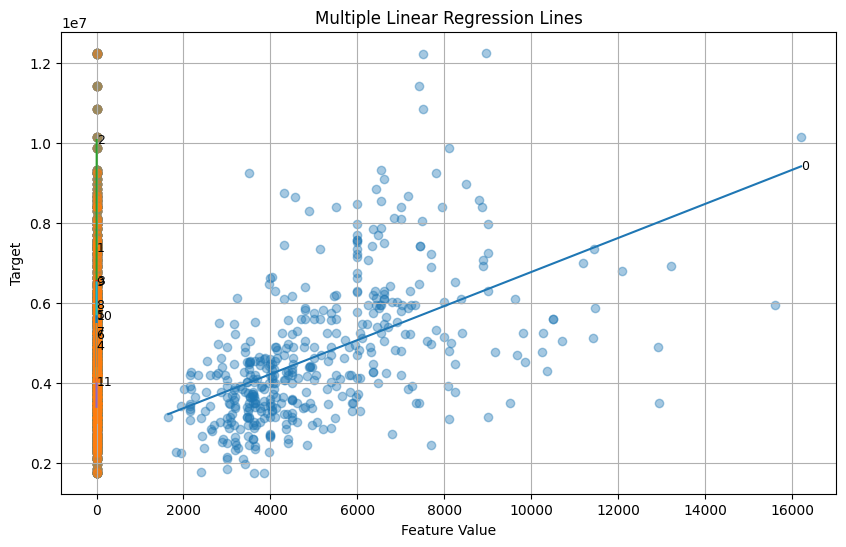

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
feature_indices = [0,1,2,3,4,5,6,7,8,9,10,11]  # Change to any 3 features you want to plot
feature_names = X_train.columns.tolist()  # Get feature names from DataFrame
plt.figure(figsize=(10, 6))
for feature_index in feature_indices:
    # Select the feature for regression
    X_feature = X_train.iloc[:, feature_index].values.reshape(-1, 1)  # Use iloc for DataFrame indexing
    model = LinearRegression()
    model.fit(X_feature, y_train)
    # Prepare data range for smooth line plot
    X_range = np.linspace(X_feature.min(), X_feature.max(), 100).reshape(-1, 1)
    y_pred_line = model.predict(X_range)
    # Plot regression line
    plt.plot(X_range, y_pred_line)
    plt.text(X_range[-1], y_pred_line[-1],feature_index, fontsize=9, ha='left', va='center')
    # Scatter plot of training data for this feature
    plt.scatter(X_feature, y_train, alpha=0.4)
    # Print coefficient and intercept
    print(f"{feature_index}.{feature_names[feature_index]} Regression:")
    print(f"  Intercept: {model.intercept_}")
    print(f"  Coefficient: {model.coef_[0]}\n")
plt.xlabel('Feature Value')
plt.ylabel('Target')
plt.title('Multiple Linear Regression Lines')
plt.grid(True)
plt.show()

## 📊 Feature-by-Feature Relationship Analysis

| Feature               | Intercept        | Coefficient        | Interpretation |
|-----------------------|------------------|--------------------|----------------|
| **area**              | 2,512,254.26     | 425.73             | Positive: More area = higher price. Each unit increase in area adds ~425 units to price. |
| **bedrooms**          | 2,123,152.26     | 873,140.74         | Positive: Each additional bedroom significantly increases price (~873,141). |
| **bathrooms**         | 2,223,852.17     | 1,960,953.61       | Positive: Bathrooms have a **strong** positive impact on price—each extra bathroom nearly 2M higher. |
| **stories**           | 3,227,798.30     | 829,763.04         | Positive: More stories = higher price, adding ~830k each. |
| **mainroad**          | 3,396,518.55     | 1,527,176.08       | Positive: Having access to a main road (coded 1) raises price significantly (~1.5M). |
| **guestroom**         | 4,489,843.41     | 1,211,207.87       | Positive: Having a guest room adds ~1.2M to the price. |
| **basement**          | 4,435,660.50     | 757,038.22         | Positive: Basement presence adds ~757k. |
| **hotwaterheating**   | 4,676,057.83     | 603,851.26         | Positive: Adds ~600k to price. |
| **airconditioning**   | 4,156,110.93     | 1,790,907.28       | Positive: Air conditioning has a **big** impact (~1.8M). |
| **parking**           | 4,172,510.43     | 778,700.31         | Positive: Each additional parking spot adds ~779k. |
| **prefarea**          | 4,415,446.38     | 1,244,228.62       | Positive: Preferred area adds ~1.2M. |
| **furnishingstatus**  | 5,467,302.54     | -717,960.97        | **Negative**: Higher furnishing status (coded as increasing numbers) **decreases** the price. Possibly due to how encoding assigned values (e.g. 'furnished' = 0, 'semi-furnished' = 1, etc.). |

---

### 📝 Notes:
- ✅ All features except **furnishingstatus** have a **positive** relationship with price.
- 🚨 The negative coefficient for furnishingstatus may be due to **label encoding**—consider one-hot encoding for a clearer interpretation.
- 📈 Features like **bathrooms, airconditioning, mainroad, and prefarea** show a **strong impact**, which could guide investment priorities.
